# **CSE422 Project (Group-6)**
# Loan Prediction

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

## **Data Visualization**

In [ ]:
d=pd.read_csv('new_merged_file_up(with_null_values).csv')
d.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Emp
0,1,1303834.0,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,NaN
1,2,7574516.0,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,NaN
2,3,3991815.0,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,NaN
3,4,6256451.0,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,NaN
4,5,5768871.0,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,NaN


In [ ]:
d.shape

(280000, 14)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 280000 non-null  int64  
 1   Income             279989 non-null  float64
 2   Age                280000 non-null  int64  
 3   Experience         280000 non-null  int64  
 4   Married/Single     280000 non-null  object 
 5   House_Ownership    280000 non-null  object 
 6   Car_Ownership      280000 non-null  object 
 7   Profession         280000 non-null  object 
 8   CITY               280000 non-null  object 
 9   STATE              280000 non-null  object 
 10  CURRENT_JOB_YRS    280000 non-null  int64  
 11  CURRENT_HOUSE_YRS  280000 non-null  int64  
 12  Risk_Flag          280000 non-null  int64  
 13  Emp                0 non-null       float64
dtypes: float64(2), int64(6), object(6)
memory usage: 29.9+ MB


In [ ]:
d.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Emp
count,280000.000000,2.799890e+05,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,0.0
mean,140000.500000,5.000346e+06,49.964132,10.088032,6.334418,11.997193,0.123532,NaN
std,80829.182024,2.876985e+06,17.070465,6.005066,3.646864,1.398907,0.329048,NaN
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,NaN
25%,70000.750000,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000,NaN
50%,140000.500000,5.003310e+06,50.000000,10.000000,6.000000,12.000000,0.000000,NaN
75%,210000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,NaN
max,280000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,NaN


[]

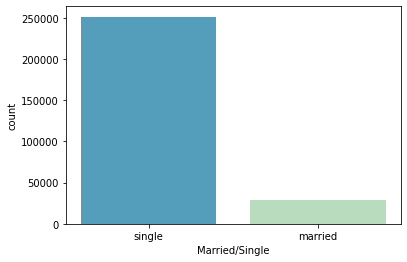

In [ ]:
sns.countplot(x='Married/Single',palette='GnBu_r',data=d)
plt.plot()

[]

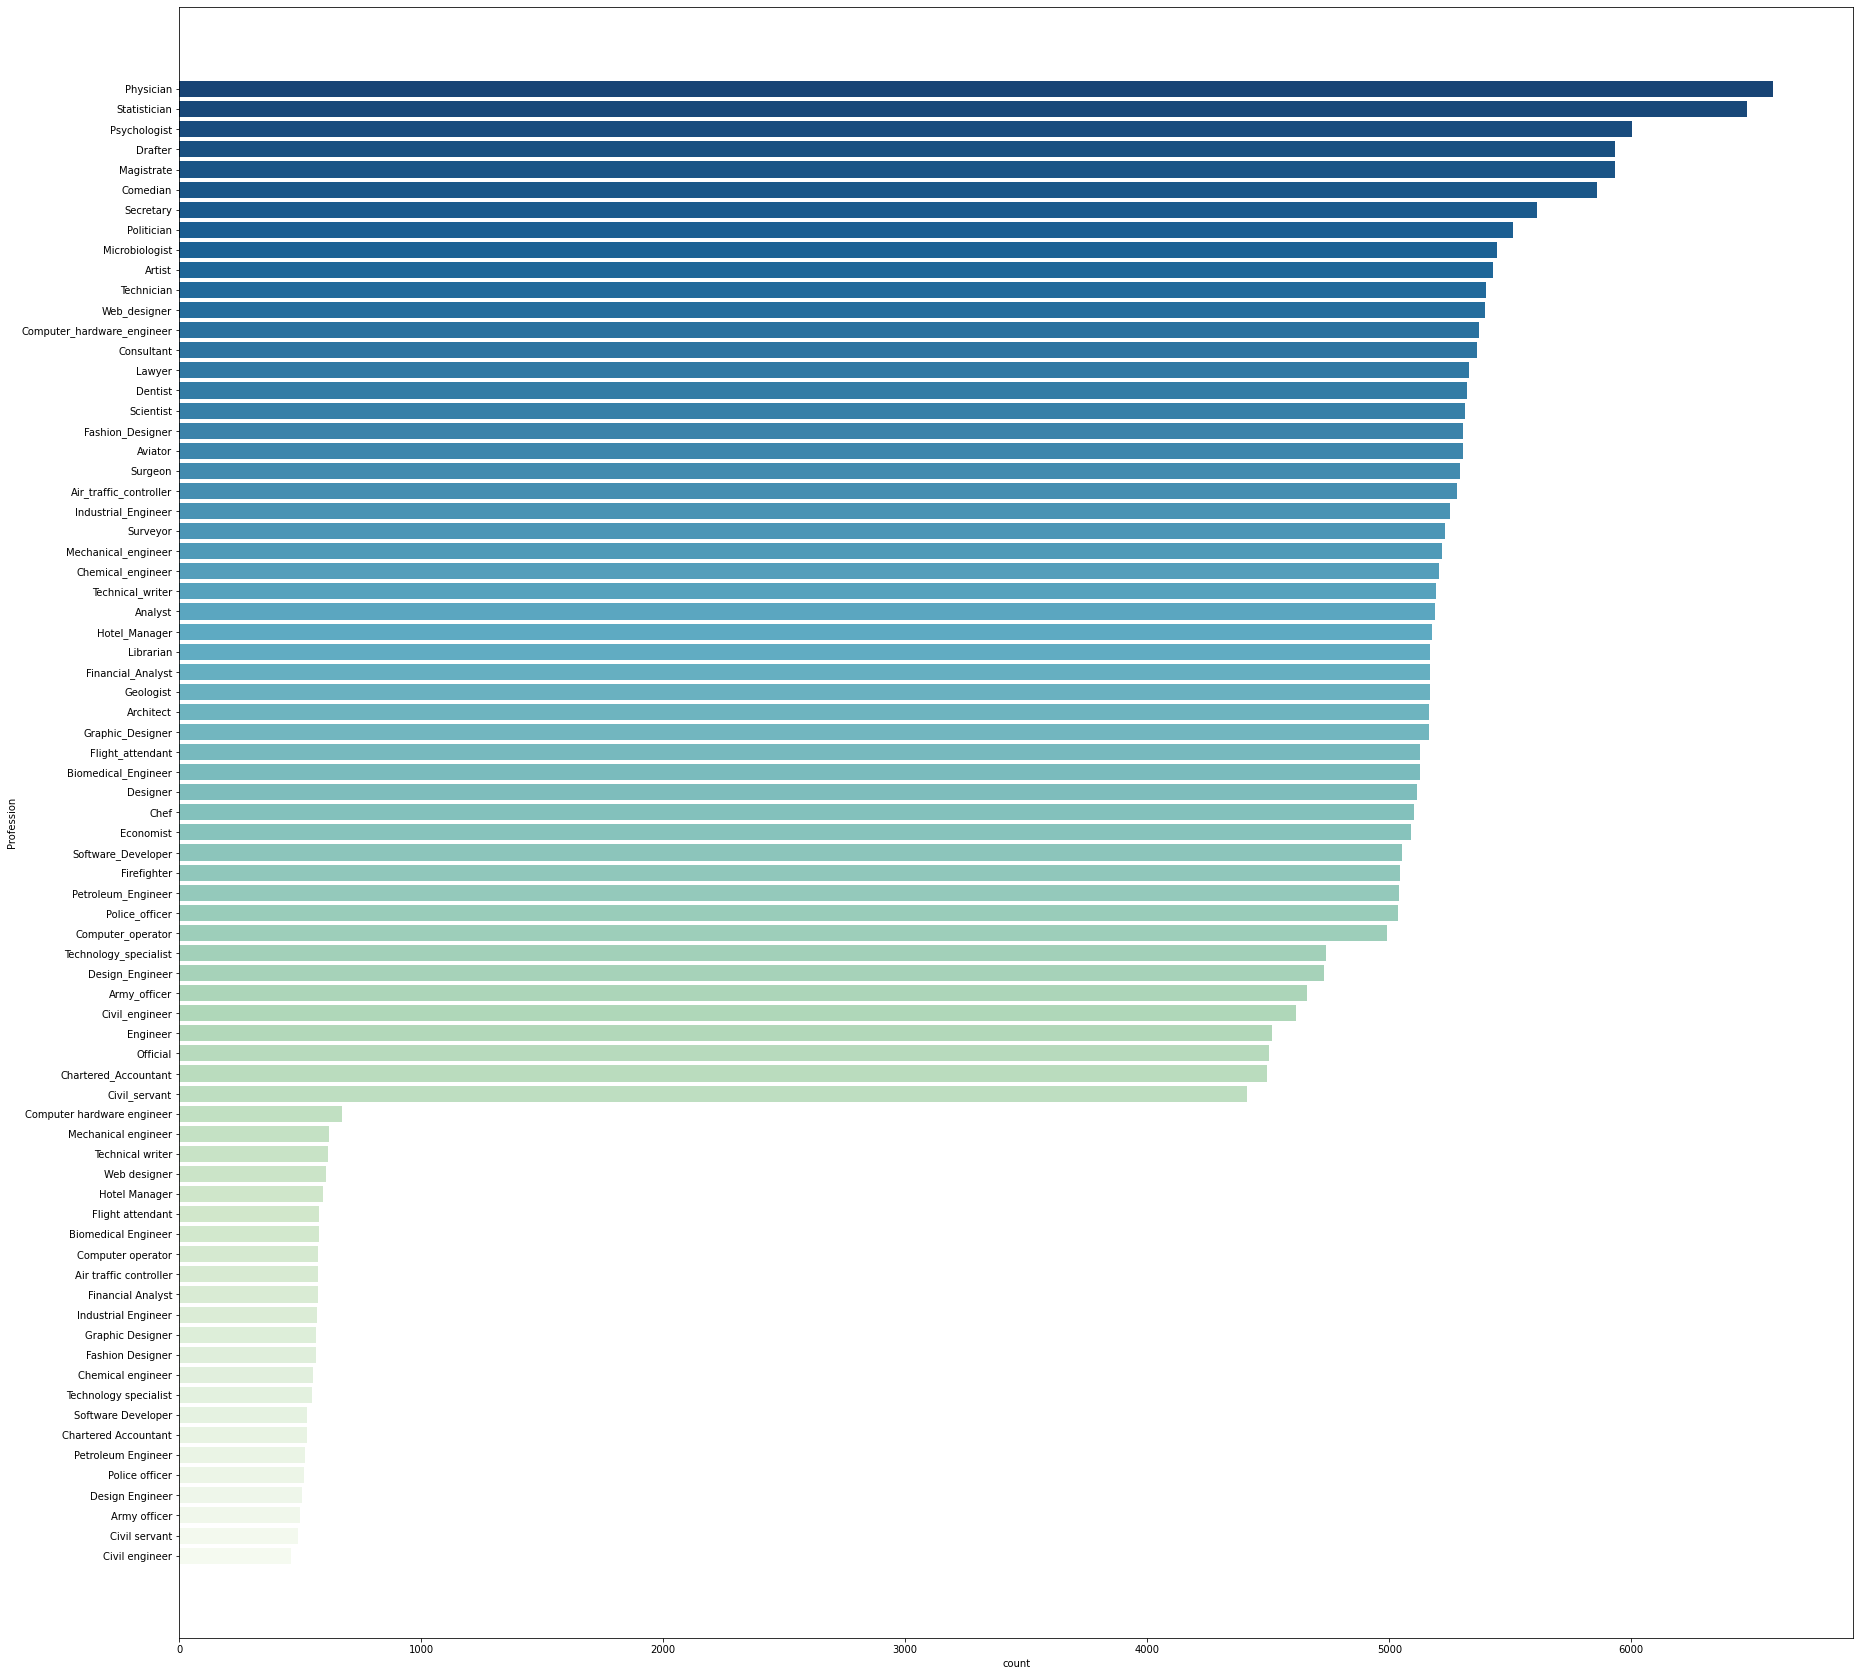

In [ ]:
plt.figure(figsize=(30,30))
sns.countplot(y=d['Profession'],order=d['Profession'].value_counts().index,palette='GnBu_r')
plt.plot()

In [ ]:
d['CITY'].describe()

count            280000
unique              333
top       Vijayanagaram
freq               1407
Name: CITY, dtype: object

In [ ]:
d['STATE'].describe()

count            280000
unique               37
top       Uttar_Pradesh
freq              28400
Name: STATE, dtype: object

[]

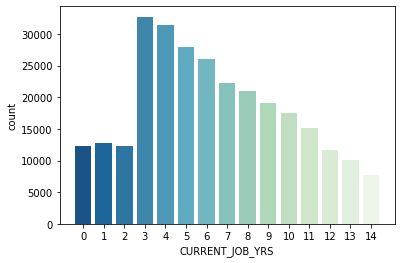

In [ ]:
sns.countplot(x=d['CURRENT_JOB_YRS'],palette='GnBu_r')
plt.plot()

[]

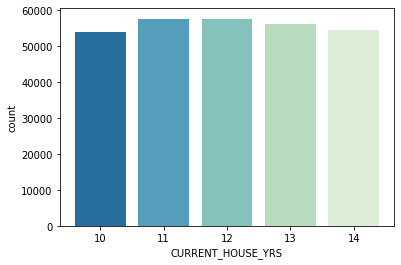

In [ ]:
sns.countplot(x=d['CURRENT_HOUSE_YRS'],palette='GnBu_r')
plt.plot()

[]

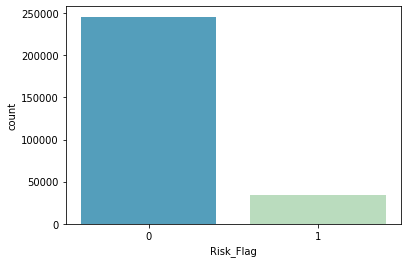

In [ ]:
sns.countplot(x=d['Risk_Flag'],palette='GnBu_r')
plt.plot()

## **Data Preprocessing**

In [ ]:
d.isnull().sum()

Id                        0
Income                   11
Age                       0
Experience                0
Married/Single            0
House_Ownership           0
Car_Ownership             0
Profession                0
CITY                      0
STATE                     0
CURRENT_JOB_YRS           0
CURRENT_HOUSE_YRS         0
Risk_Flag                 0
Emp                  280000
dtype: int64

**Dropping those rows which have null values**

In [ ]:
print("Shape of dataframe before dropping rows:", d.shape)
d = d.dropna(axis = 0, subset = ['Income'])
print("Shape after dropping rows:", d.shape)

Shape of dataframe before dropping rows: (280000, 14)
Shape after dropping rows: (279989, 14)


**Dropping Empty column**

In [ ]:
d = d.drop(['Emp'], axis = 1)
d.shape

(279989, 13)

**Dropping the Id column as it will not be used for running models**

In [ ]:
d.drop('Id',axis = 1,inplace=True)

In [ ]:
d.shape

(279989, 12)

In [ ]:
d.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**Just separating the columns**

In [ ]:
exclude = ['Risk_Flag','STATE','CITY','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']
numeric = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
categorical = ['Profession']
dummies = ['Married/Single', 'House_Ownership', 'Car_Ownership']

**Getting dummies (0s and 1s) for the particular columns as those values of the columns are not integer**

In [ ]:
p = pd.get_dummies(d,columns=dummies)

**Label encoding for the Profession column**

In [ ]:
for col in categorical:
    p[col] = LabelEncoder().fit_transform(p[col])

**Separating feature**

In [ ]:
x = p.drop(exclude, axis=1)
y = p["Risk_Flag"]

**Splitting Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(223991, 11)
(55998, 11)


**Scaling feature**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

## **Running Models**

**Logistic Regression**

In [ ]:
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train) # Training the model

LogisticRegression(max_iter=10000)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.88
The Testing accuracy of the model is 0.88


In [ ]:
predictions1 = log.predict(x_test)
print(predictions1) # printing predictions

[0 0 0 ... 0 0 0]


In [ ]:
print ("Accuracy : ", accuracy_score(y_test, predictions1))

Accuracy :  0.8764420157862781


In [ ]:
mat1=confusion_matrix(log.predict(x_test), y_test)
print(mat1)

[[49079  6919]
 [    0     0]]


[]

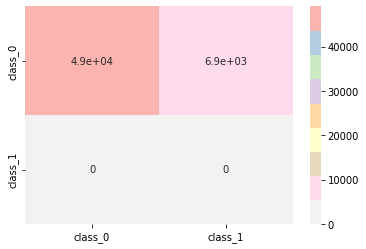

In [ ]:
heatmap(mat1 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)
plt.plot()

**Naive Bayes Classifier / Gaussian**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

Training accuracy of the model is 0.88
Testing accuracy of the model is 0.88


In [ ]:
predictions2 = gnb.predict(x_test)
print(predictions2)

[0 0 0 ... 0 0 0]


In [ ]:
print ("Accuracy : ", accuracy_score(predictions2, y_test))

Accuracy :  0.8764420157862781


In [ ]:
mat2=confusion_matrix(predictions2, y_test)
print(mat2)

[[49079  6919]
 [    0     0]]


[]

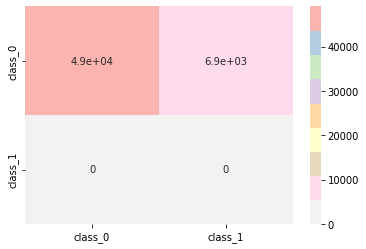

In [ ]:
heatmap(mat2 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)
plt.plot()

**Random Forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 0.93
The Testing accuracy of the model is 0.89


In [ ]:
predictions3 = rfc.predict(x_test)
print(predictions3)

[1 0 0 ... 0 1 0]


In [ ]:
print ("Accuracy : ", accuracy_score(y_test, predictions3))

Accuracy :  0.890603235829851


In [ ]:
mat4=confusion_matrix(predictions3, y_test)
print(mat4)

[[46692  3739]
 [ 2387  3180]]


[]

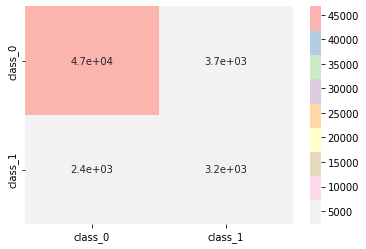

In [ ]:
heatmap(mat4 , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)
plt.plot()